# Carga de datos y preprocesamiento

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv('/content/caracteristicas_completo_filtro.csv')
# eliminar chars
X = df.drop(columns=['persona', 'repeticion', 'actividad'])
y = df['actividad']
# objeto
label_encoder = LabelEncoder()
# ajustar el codificador a la variable de destino y transformarlo
y = label_encoder.fit_transform(y)
# escalar caracterisitcas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# 70-30
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Adaboost

In [34]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print("=== Adaboost ===")
print(classification_report(y_test, y_pred_ada))


=== Adaboost ===
              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.83      0.91         6
           2       0.86      1.00      0.92         6

    accuracy                           0.88        17
   macro avg       0.89      0.88      0.88        17
weighted avg       0.89      0.88      0.88        17



In [35]:
resultados = []
resultados.append({
    'Clasificador': 'Adaboost',
    'Exactitud': accuracy_score(y_test, y_pred_ada),
    'Precision': precision_score(y_test, y_pred_ada, average='macro', zero_division=0),
    'Recall': recall_score(y_test, y_pred_ada, average='macro', zero_division=0),
    'F1-score': f1_score(y_test, y_pred_ada, average='macro', zero_division=0)
})

# KNN Minkowski

El mejor valor de k es: 9 con una precisión promedio de: 0.8107


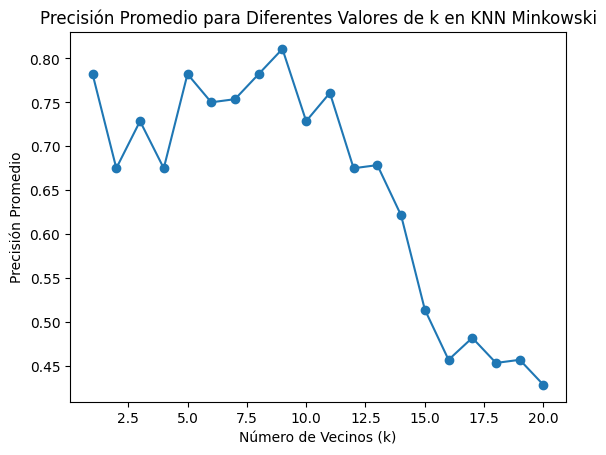

=== KNN Minkowski con Mejor k ===
              precision    recall  f1-score   support

           0       0.60      0.60      0.60         5
           1       0.83      0.83      0.83         6
           2       0.83      0.83      0.83         6

    accuracy                           0.76        17
   macro avg       0.76      0.76      0.76        17
weighted avg       0.76      0.76      0.76        17



In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
k_values = range(1, 21)  # P1-20 mejor k

# guardar el mejor k
cv_scores = []

# CV 5 pliegues
for k in k_values:
    knn_minko = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=3)
    scores = cross_val_score(knn_minko, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())
best_k = k_values[cv_scores.index(max(cv_scores))]
best_score = max(cv_scores)

print(f"El mejor valor de k es: {best_k} con una precisión promedio de: {best_score:.4f}")

plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión Promedio')
plt.title('Precisión Promedio para Diferentes Valores de k en KNN Minkowski')
plt.show()
knn_best = KNeighborsClassifier(n_neighbors=best_k, metric='minkowski', p=3)
knn_best.fit(X_train, y_train)
y_pred_knn_best = knn_best.predict(X_test)

print("=== KNN Minkowski con Mejor k ===")
print(classification_report(y_test, y_pred_knn_best))

In [37]:
resultados.append({
    'Clasificador': 'KNN Minkowski',
    'Exactitud': accuracy_score(y_test, y_pred_knn_minko),
    'Precision': precision_score(y_test, y_pred_knn_minko, average='macro', zero_division=0),
    'Recall': recall_score(y_test, y_pred_knn_minko, average='macro', zero_division=0),
    'F1-score': f1_score(y_test, y_pred_knn_minko, average='macro', zero_division=0)
})

# KNN Coseno

El mejor valor de k es: 1 con una precisión promedio de: 0.8893


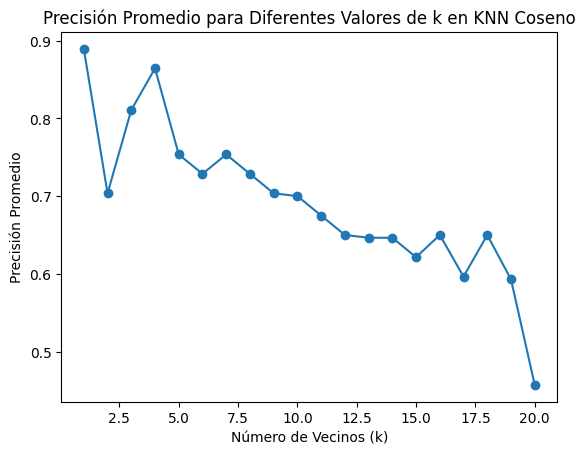

=== KNN Cosine ===
              precision    recall  f1-score   support

           0       0.57      0.80      0.67         5
           1       0.75      0.50      0.60         6
           2       1.00      1.00      1.00         6

    accuracy                           0.76        17
   macro avg       0.77      0.77      0.76        17
weighted avg       0.79      0.76      0.76        17



In [38]:
k_values = range(1, 21)
cv_scores = []

for k in k_values:
    knn_cos = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    scores = cross_val_score(knn_cos, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

best_k = k_values[cv_scores.index(max(cv_scores))]
best_score = max(cv_scores)

print(f"El mejor valor de k es: {best_k} con una precisión promedio de: {best_score:.4f}")

plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Precisión Promedio')
plt.title('Precisión Promedio para Diferentes Valores de k en KNN Coseno')
plt.show()

knn_best_cos = KNeighborsClassifier(n_neighbors=best_k, metric='cosine')
knn_best_cos.fit(X_train, y_train)
y_pred_knn_best_cos = knn_best_cos.predict(X_test)


print("=== KNN Cosine ===")
print(classification_report(y_test, y_pred_knn_best_cos))


In [39]:
resultados.append({
    'Clasificador': 'KNN Cosine',
    'Exactitud': accuracy_score(y_test, y_pred_knn_best_cos),
    'Precision': precision_score(y_test, y_pred_knn_best_cos, average='macro', zero_division=0),
    'Recall': recall_score(y_test, y_pred_knn_best_cos, average='macro', zero_division=0),
    'F1-score': f1_score(y_test, y_pred_knn_best_cos, average='macro', zero_division=0)
})

# LDA (Análisis Discriminante Lineal)

In [40]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

print("=== LDA ===")
print(classification_report(y_test, y_pred_lda))


=== LDA ===
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         6

    accuracy                           0.94        17
   macro avg       0.94      0.94      0.94        17
weighted avg       0.95      0.94      0.94        17



In [41]:
resultados.append({
    'Clasificador': 'LDA',
    'Exactitud': accuracy_score(y_test, y_pred_lda),
    'Precision': precision_score(y_test, y_pred_lda, average='macro', zero_division=0),
    'Recall': recall_score(y_test, y_pred_lda, average='macro', zero_division=0),
    'F1-score': f1_score(y_test, y_pred_lda, average='macro', zero_division=0)
})

# Fifth-SVM (ej. SVM con kernel 'sigmoid' como una alternativa creativa)

In [42]:
from sklearn.svm import SVC

svm_fifth = SVC(kernel='sigmoid', C=1.0, gamma='scale')
svm_fifth.fit(X_train, y_train)
y_pred_fifth = svm_fifth.predict(X_test)

print("=== Fifth-SVM (sigmoid) ===")
print(classification_report(y_test, y_pred_fifth))


=== Fifth-SVM (sigmoid) ===
              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.83      0.83      0.83         6
           2       0.71      0.83      0.77         6

    accuracy                           0.71        17
   macro avg       0.68      0.69      0.68        17
weighted avg       0.69      0.71      0.70        17



In [43]:
resultados.append({
    'Clasificador': 'Fifth-SVM',
    'Exactitud': accuracy_score(y_test, y_pred_fifth),
    'Precision': precision_score(y_test, y_pred_fifth, average='macro', zero_division=0),
    'Recall': recall_score(y_test, y_pred_fifth, average='macro', zero_division=0),
    'F1-score': f1_score(y_test, y_pred_fifth, average='macro', zero_division=0)
})

In [44]:
tabla_resultados = pd.DataFrame(resultados)
print("=== Tabla de Métricas ===")
display(tabla_resultados)


=== Tabla de Métricas ===


,Clasificador,Exactitud,Precision,Recall,F1-score
0,Adaboost,0.882353,0.885714,0.877778,0.877389
1,KNN Minkowski,0.764706,0.755556,0.755556,0.755556
2,KNN Cosine,0.764706,0.773810,0.766667,0.755556
3,LDA,0.941176,0.944444,0.944444,0.939394
4,Fifth-SVM,0.705882,0.682540,0.688889,0.682336


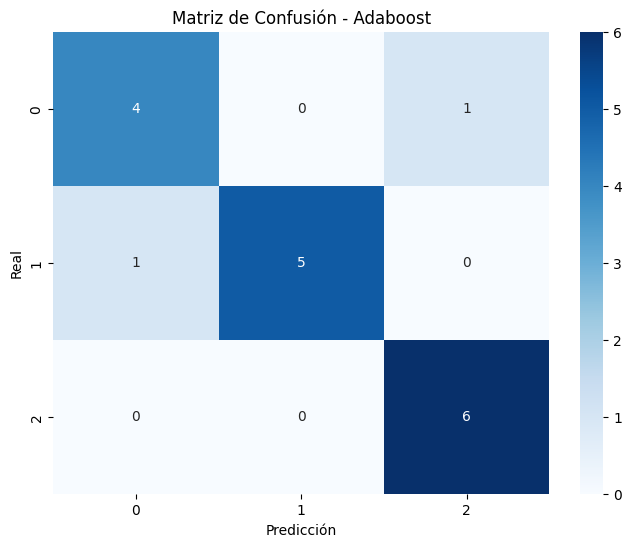

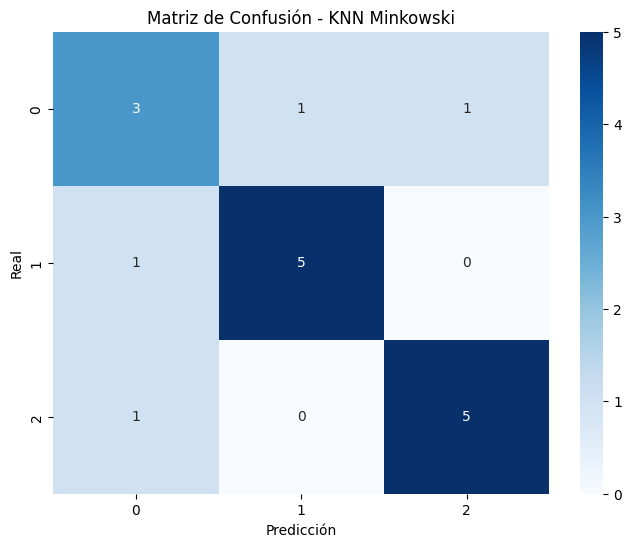

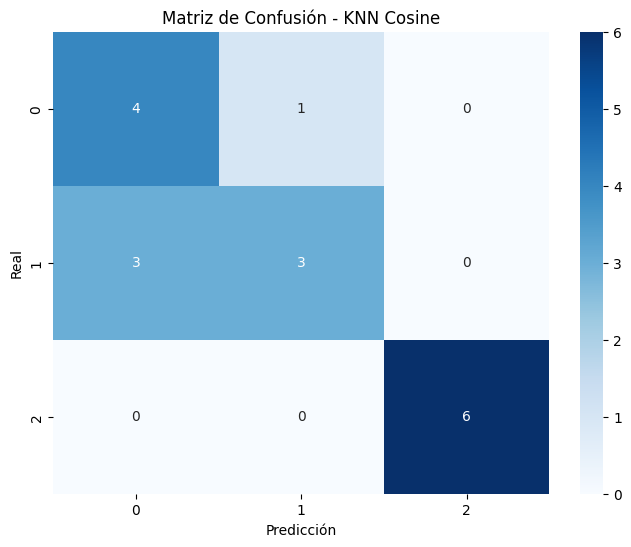

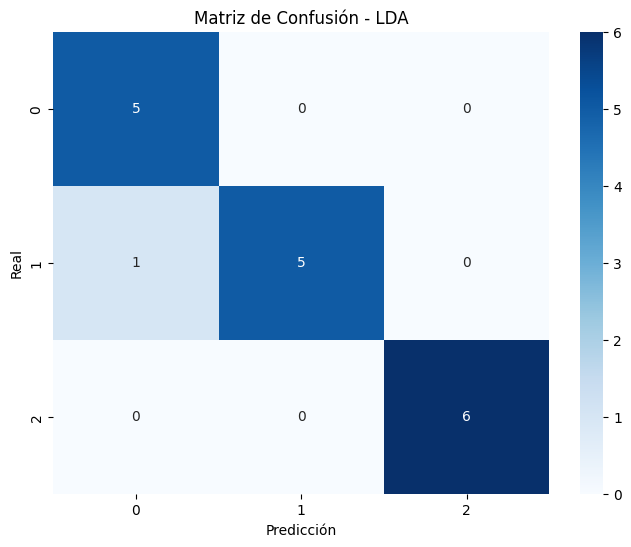

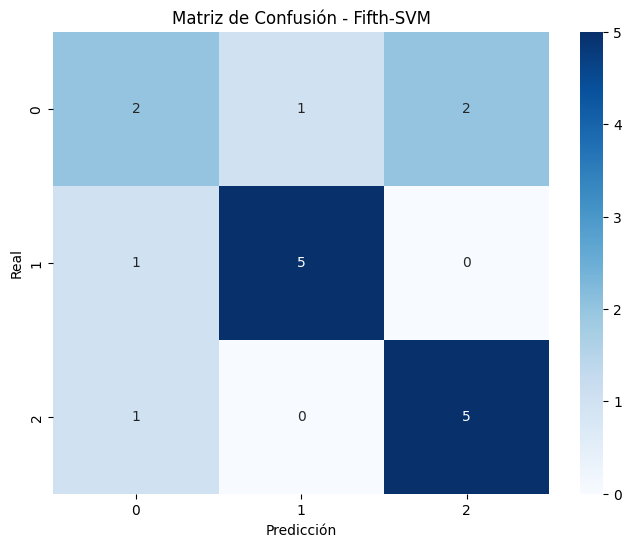

In [46]:
# adaboost
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Adaboost")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# KNN Minkowski
cm_knn_minko = confusion_matrix(y_test, y_pred_knn_minko)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_minko, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - KNN Minkowski")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# KNN Cosine
cm_knn_cos = confusion_matrix(y_test, y_pred_knn_best_cos)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_cos, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - KNN Cosine")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# LDA
cm_lda = confusion_matrix(y_test, y_pred_lda)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lda, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - LDA")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

# Fifth-SVM
cm_fifth = confusion_matrix(y_test, y_pred_fifth)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_fifth, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Fifth-SVM")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
